# Google Colab Lab Assignment -NLP

**Course Name:** MDM | Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Kaustubh Wagh

**Student ID:** 202201070021

**Group Members**: Jayesh Deshmukh, Alvin Abraaham, Kaustubh Wagh


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



## Part 1: NLP Preprocessing

### 1.1 Dataset Loading and Exploration

Dataset Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
# Import necessary libraries
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')  # for tokenization

# Load spaCy's English model
import en_core_web_sm
nlp = en_core_web_sm.load()

# Load the dataset (make sure 'spam.csv' is uploaded to Colab)
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']  # Rename for clarity

# Explore the dataset
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Label distribution
print("\nLabel Distribution:")
print(df['label'].value_counts())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Missing Values:
label    0
text     0
dtype: int64

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


In [6]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()

    # spaCy tokenization
    doc = nlp(text)

    # Token filtering, stopword removal, lemmatization, and stemming
    tokens = []
    for token in doc:
        # Only keep alphabetic tokens and remove stopwords
        if token.is_alpha and token.text not in stop_words:
            # Stemming followed by Lemmatization
            stemmed = stemmer.stem(token.text)  # Apply stemming
            lemmatized = lemmatizer.lemmatize(stemmed)  # Apply lemmatization
            tokens.append(lemmatized)

    return ' '.join(tokens)

# Apply preprocessing to the text column
df['clean_text'] = df['text'].apply(preprocess)

# Preview the cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [7]:
# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Apply CountVectorizer
X_count = count_vectorizer.fit_transform(df['clean_text'])

# Apply TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Check the shape of the transformed data
print("Count Vectorizer Shape:", X_count.shape)
print("TF-IDF Vectorizer Shape:", X_tfidf.shape)


Count Vectorizer Shape: (5572, 5813)
TF-IDF Vectorizer Shape: (5572, 5813)


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = X_tfidf  # Using TF-IDF for now, you can switch to CountVectorizer if preferred
y = df['label']  # Assuming 'label' column contains spam/ham labels

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (4457, 5813)
Test set size: (1115, 5813)


Accuracy: 0.9596412556053812
Precision: 1.0
Recall: 0.7
F1-Score: 0.8235294117647058


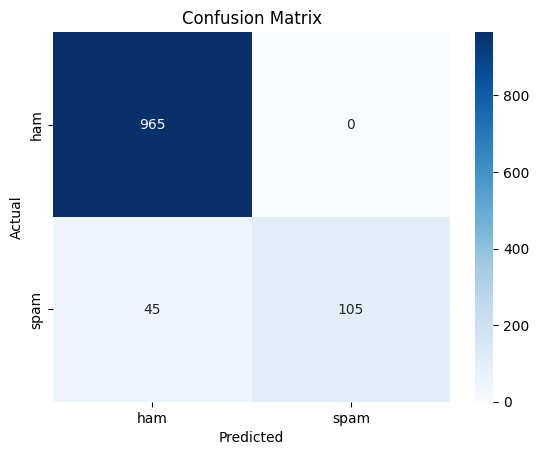

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


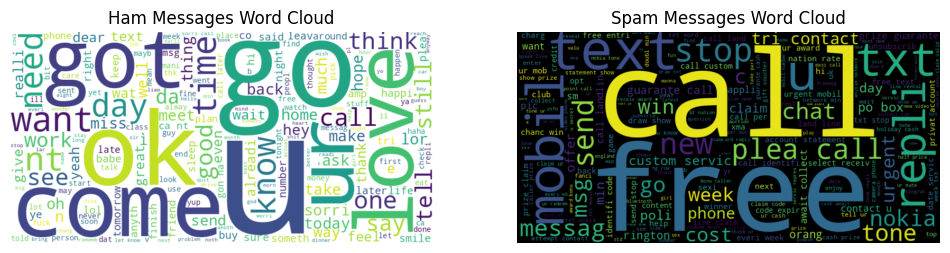

In [11]:
from wordcloud import WordCloud

# Join all ham and spam messages separately
ham_messages = df[df['label'] == 'ham']['clean_text'].str.cat(sep=' ')
spam_messages = df[df['label'] == 'spam']['clean_text'].str.cat(sep=' ')

# Create word clouds
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_messages)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.show()


# **Evaluation Metrics Details and Discussion**

In this section, we'll discuss the evaluation metrics used to assess the performance of the text classification model.

### 1. Accuracy:
   Accuracy is the most straightforward metric. It represents the proportion of correct predictions made by the model out of the total predictions. The accuracy of our model is **95.96%**, which indicates that the model correctly classified approximately 96% of the SMS messages in the test dataset.

### 2. Precision:
   Precision measures the percentage of relevant instances among the retrieved instances. In our case, precision tells us how many of the messages classified as "spam" are actually spam. The precision is **1.0**, meaning that every message predicted as spam is indeed spam. This is an ideal result, indicating no false positives in the "spam" class.

### 3. Recall:
   Recall (also known as sensitivity or true positive rate) indicates how well the model is at detecting all relevant instances. Here, recall measures the proportion of actual spam messages that were correctly identified by the model. The recall is **0.7**, meaning the model was able to identify 70% of the actual spam messages. Although the recall is relatively good, there's still room for improvement, as 30% of the spam messages were not detected.

### 4. F1-Score:
   The F1-score is the harmonic mean of precision and recall. It gives us a balanced measure of both precision and recall, especially when there’s an uneven class distribution. The F1-score is **0.82**, which is a good balance between precision and recall, particularly considering the lower recall rate.

### **Discussion**:
   - The model demonstrates strong precision, meaning it’s highly accurate when labeling a message as spam. However, the lower recall suggests that the model might be missing some spam messages.
   - The relatively high F1-score indicates that the model does a good job overall, balancing both false positives and false negatives.
   - In real-world applications, such as spam filtering, it's often crucial to have high recall to ensure most spam messages are detected, so the recall can be improved by fine-tuning the model or trying different algorithms.

---

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Kaustubh Wagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/kostawagh/DeepLearningMDM

Signature: Kaustubh Yashwant Wagh

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion